In [88]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
import pandas as pd
import numpy as np
%matplotlib inline  

In [43]:
digits = datasets.load_digits()
digits.data
digits.target

array([0, 1, 2, ..., 8, 9, 8])

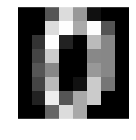

In [162]:
def display(data_array):
    plt.figure(figsize = (2, 2))
    plt.imshow(data_array, interpolation='none', cmap=plt.cm.seismic)
    plt.axis('off')
    plt.gray()
    plt.show()

display(digits.images[0])

In [72]:
digits_data_df = pd.DataFrame(digits.data)
digits_target_df= pd.DataFrame(digits.target).rename(columns={0:'target'})

digits_df = pd.concat([digits_data_df, digits_target_df], axis = 1)
# digits_train, digit_test = train_test_split
digits_df['label'] = digits_df.apply(lambda row: 1 if row['target'] == 0 else 0, axis = 1)

zero_train, zero_test = train_test_split(digits_df, test_size=0.3)

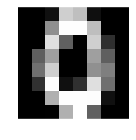

In [165]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(zero_train.iloc[:, 0:64], zero_train['label'])
predict = clf.predict(zero_test.iloc[:,0:64])
predict_score = clf.predict_proba(zero_test.iloc[:,0:64])[:,1]
zero_test.shape, predict_score

# sorted(range(len(predict_score)), key=lambda k: predict_score[k])
sorted_idx = [(i[0], i[1]) for i in sorted(enumerate(predict_score), key=lambda x:x[1], reverse=True)]
display(digits.images[zero_test.index[sorted_idx[0][0]]])

In [86]:
accuracy = accuracy_score(zero_test['label'], predict)
print(accuracy)
confusion_matrix(zero_test['label'], predict)

1.0


array([[486,   0],
       [  0,  54]])

In [171]:
fpr, tpr, thresholds = roc_curve(zero_test['label'], predict_score)
roc_auc = auc(fpr, tpr)
# roc_auc
print(fpr)
print(tpr)
print(thresholds[3])

[ 0.          0.          0.          0.          0.14197531  0.14609053
  0.24074074  0.24485597  0.25514403  0.26337449  0.2654321   0.27366255
  0.27572016  0.27983539  0.281893    0.28806584  0.29012346  0.2962963
  0.29835391  0.30246914  0.30452675  0.33950617  1.        ]
[ 0.01851852  0.25925926  0.2962963   1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.        ]
0.575797384314


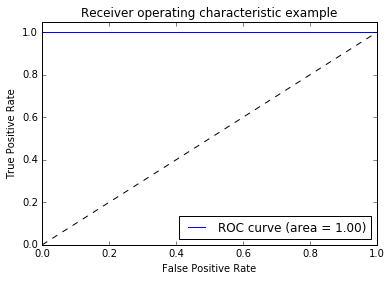

In [106]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

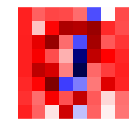

In [120]:
# visualize weights
weights_2d = clf.coef_.reshape((8, 8))
display(weights_2d)

fake_zero = [
            0,0,0,0,0,0,0,0,
            0,0,1,1,1,1,0,0,
            0,0,1,0,0,1,0,0,
            0,0,1,0,0,1,0,0,
            0,0,1,0,0,1,0,0,
            0,0,1,0,0,1,0,0,
            0,0,1,1,1,1,0,0,
            0,0,0,0,0,0,0,0,]

clf.predict_proba([fake_zero])